In [217]:
import time

import cv2
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

In [309]:
def show(image):
    plt.imshow(image, cmap='gray')
    _ = plt.axis('off')
    plt.show()

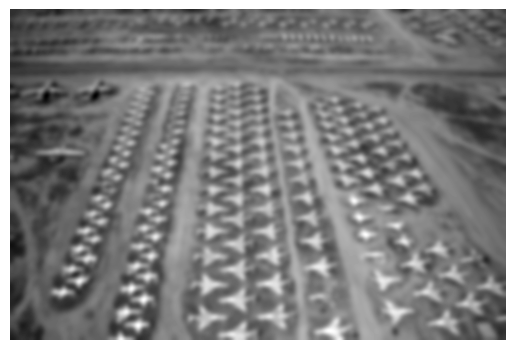

In [604]:
image_orig = cv2.imread('./images/image1.jpg')
image = cv2.cvtColor(image_orig, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (31, 31), 0)
show(image)

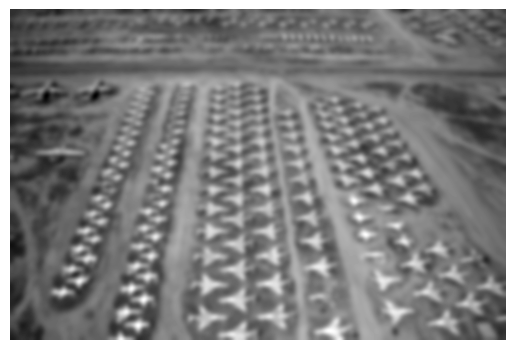

In [605]:
blurred = cv2.GaussianBlur(image, (9, 9), 0)
show(image)

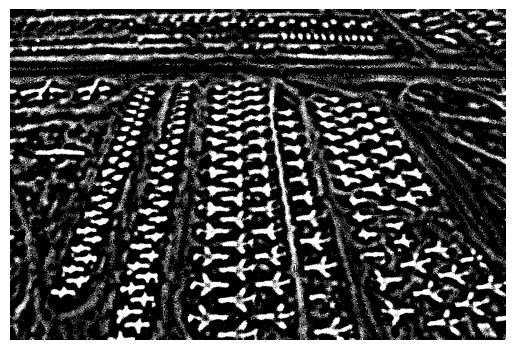

In [606]:
show(blurred - image)

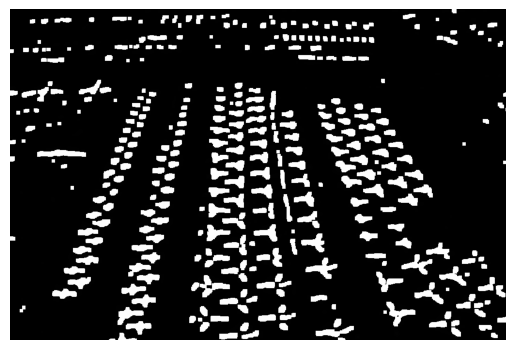

In [607]:
gauss_contours = blurred - image
processed = cv2.dilate(cv2.erode(gauss_contours, np.ones((3, 3), np.uint8), iterations=2), np.ones((2, 2), np.uint8), iterations=6)
show(processed)

In [601]:
_, labels, stats, _ = cv2.connectedComponentsWithStats(processed, 4)

In [602]:
labels = np.unique(labels)
len(labels)

800

In [603]:
threshold_S = 50
for label in labels:
    if stats[label, cv2.CC_STAT_AREA] < threshold_S:
        labels[labels == label] = 0
len(np.unique(labels))

723

Approximate number of planes: 365


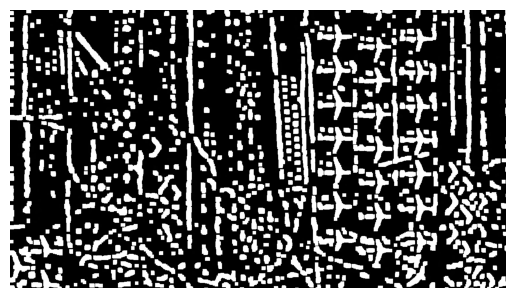

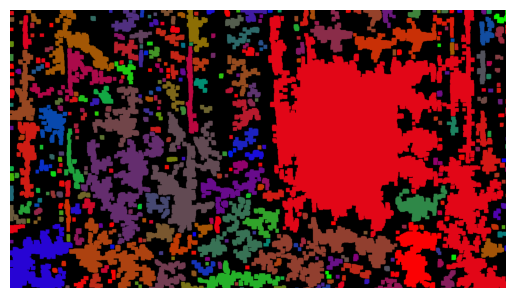

In [458]:
gauss_contours = blurred - image

# Opening
erosion = cv2.erode(gauss_contours, np.ones((3, 3), np.uint8), iterations=2)
dilation = cv2.dilate(erosion, np.ones((2, 2), np.uint8), iterations=8)

# Find contours
contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f'Approximate number of planes: {len(contours)}')
show(dilation)

mask = np.zeros_like(image_orig)
for contour in contours:
    num1 = np.random.randint(0, 255)
    num2 = np.random.randint(0, 255 - num1)
    fill_color = (num1, num2, 255 - num1 - num2)
    cv2.drawContours(mask, [contour], 0, fill_color, -1)
show(mask)

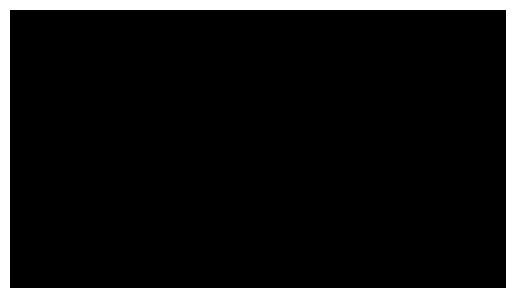

In [459]:
edges = cv2.Canny(blurred, 150, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(blurred)
fill_color = (0, 255, 0)  # color for segmented objects

for contour in contours:
    cv2.drawContours(mask, [contour], 0, fill_color, -1)
show(mask)

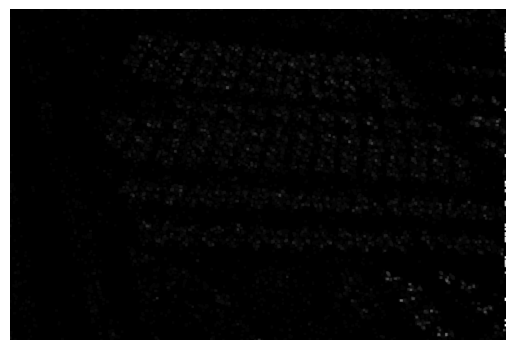

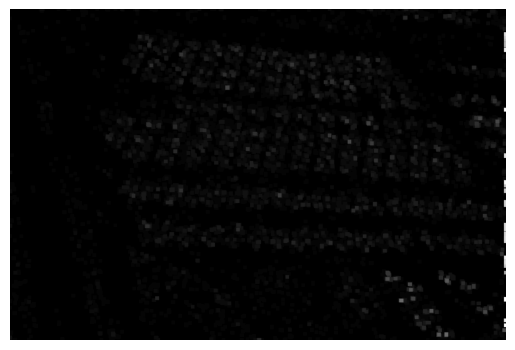

In [294]:
opened = cv2.morphologyEx(blurred, cv2.MORPH_OPEN, np.ones((7, 7), np.uint8))
show(opened)
closed = cv2.dilate(opened, np.ones((3, 3), np.uint8), iterations=2)
show(closed)

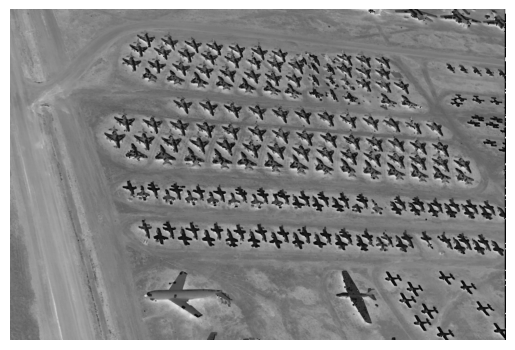

In [295]:
kernel_dilate = np.ones((3, 3), np.uint8)
kernel_erode = np.ones((3, 3), np.uint8)
contours = cv2.erode(cv2.dilate(blurred, kernel_dilate, iterations=1) - image, kernel_erode, iterations=1)
show(contours)

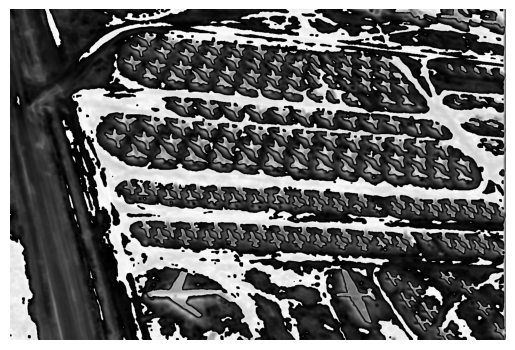

In [185]:
contours = cv2.erode(cv2.dilate(contours, kernel_dilate, iterations=1) - image, kernel_erode, iterations=1)
show(contours)

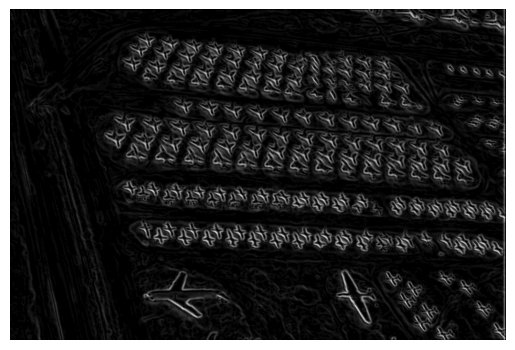

In [135]:
kernel_dilate = np.ones((3, 3), np.uint8)
kernel_erode = np.ones((3, 3), np.uint8)
contours = cv2.erode(cv2.dilate(image, kernel_dilate, iterations=1) - image, kernel_erode, iterations=1)
show(contours)

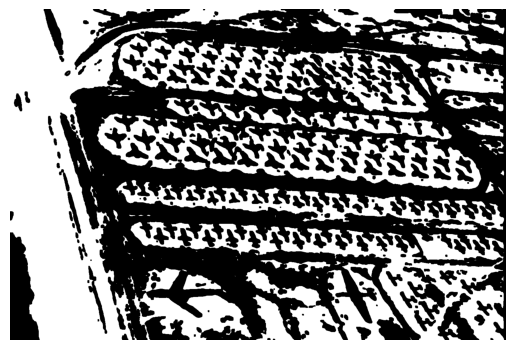

In [164]:
_, th = cv2.threshold(contours, np.mean(contours) * 1, 255, cv2.THRESH_BINARY)
show(cv2.erode(th, np.ones((2, 2), np.uint8), iterations=1))